In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from src import main, utils
import numpy as np
import seaborn as sns

In [3]:
df = utils.generate_df(ids_num=int(1e5), sigma=2)
old, new = df["old_convs"], df["new_convs"]
# old, new = utils.generate_convs()

In [4]:
df

,uid,old_convs,new_convs
0,5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...,0,0
1,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...,0,0
2,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,0,0
3,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,0,0
4,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,0,0
...,...,...,...
2093079,c1d584fb558cee49d5c132cfe421cfbc222e96a7b889ec...,0,0
2093080,c1d584fb558cee49d5c132cfe421cfbc222e96a7b889ec...,0,0
2093081,fd5f56b40a79a385708428e7b32ab996a681080a166a22...,0,0
2093082,fd5f56b40a79a385708428e7b32ab996a681080a166a22...,0,0


In [5]:
display(
    main.find_means(old, new),
    main.find_percentiles(old, new, 10),
    main.t_test(old, new),
    main.anova(old, new),
)

(0.0007520003974995748, 0.0008045544278203837)

(0.0, 0.0)

(-1.9279079793280354, 0.053866640633387426)

(3.7168291767567005, 0.05386664064422803)

[(0.0, 1000.0)]

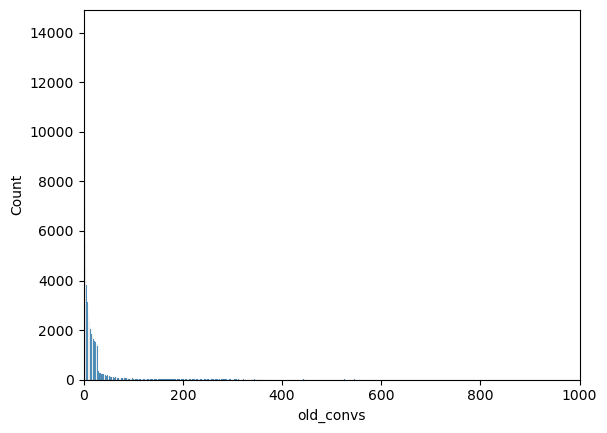

In [12]:
uids_count = df.groupby("uid").count()["old_convs"]

sns.histplot(uids_count).set(xlim=(0, 1000))

In [7]:
uids_count.describe()

count    100000.000000
mean         20.930840
std          54.416951
min           1.000000
25%           3.000000
50%           8.000000
75%          20.000000
max         995.000000
Name: old_convs, dtype: float64

In [10]:
df_reduced = main.reduce_uids(df)
old, new = df_reduced["old_convs"], df_reduced["new_convs"]

display(
    main.find_means(old, new),
    main.find_percentiles(old, new, 10),
    main.t_test(old, new),
    main.anova(old, new),
)

(0.0149, 0.01606)

(0.0, 0.0)

(-2.101105518184108, 0.03563295270446275)

(4.414644398543697, 0.035632952706768965)